## 1. Import Libraries
This block imports essential libraries for data manipulation (pandas, numpy), sentiment analysis (TextBlob), statistical correlation (scipy.stats), and visualization (matplotlib, seaborn).

In [14]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load News and Stock Data
Loads the processed news sentiment data and Apple's historical stock data from CSV files. Handles file errors and ensures the required files are present.

In [15]:
try:
    # Load the news csv file
    news_df = pd.read_csv('../../data/processed_analyst_ratings.csv')
    # Load Historical Data
    stock_df = pd.read_csv('../../data/yfinance_data/TSLA_historical_data.csv')
except FileNotFoundError:
    print("File not found. Please ensure the path is correct and the file exists.")
    exit(1)
except Exception as e:
    print(f"An error occurred while reading the parquet file: {e}")
    exit(1)

## 3. Convert Date Columns to Datetime
Converts the date columns in both DataFrames to datetime format for accurate merging and time-based analysis.

In [16]:
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', utc=True)
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='mixed', utc=True)

## 4. Merge News and Stock Data
Merges the news and stock DataFrames on the date columns to align sentiment scores with corresponding stock prices.

In [17]:
merged_df = pd.merge(news_df[news_df['stock'] == 'TSLA'], 
                     stock_df, left_on='date', right_on='Date', how='left')

## 5. Inspect Merged Data
Displays the shape and a sample of the merged DataFrame to verify the merge and inspect the data.

In [18]:
print(merged_df.shape)
merged_df.head(5)

(1775, 15)


,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00+00:00,TSLA,0.066667,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
1,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00+00:00,TSLA,0.250000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
2,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00+00:00,TSLA,0.000000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
3,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00+00:00,TSLA,0.000000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0
4,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00+00:00,TSLA,0.000000,2019-07-02 00:00:00+00:00,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0


## 6. Handle Missing Values
Checks for missing values in the merged DataFrame, drops any rows with missing data, and displays the new shape.

In [19]:
# Check for missing values
print(merged_df['date'].isnull().sum())
merged_df.dropna(inplace=True)  # Drop missing values if necessary
merged_df.shape

0


(1775, 15)

## 7. Calculate Daily Returns
Calculates the daily stock return as the percentage change in the closing price and adds it as a new column.

In [20]:
merged_df['daily_return'] = merged_df['Close'].pct_change()  # Calculate daily returns
merged_df.head()

,headline,url,publisher,date,stock,sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,daily_return
0,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00+00:00,TSLA,0.066667,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,NaN
1,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00+00:00,TSLA,0.250000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,0.000000
2,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00+00:00,TSLA,0.000000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,0.000000
3,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00+00:00,TSLA,0.000000,2019-07-01 00:00:00+00:00,15.347333,15.540000,15.085333,15.144667,15.144667,123201000,0.0,0.0,0.000000
4,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00+00:00,TSLA,0.000000,2019-07-02 00:00:00+00:00,15.259333,15.276667,14.814667,14.970000,14.970000,138885000,0.0,0.0,-0.011533


## 8. Pearson Correlation Calculation
Drops rows with missing sentiment or daily return values, then calculates and prints the Pearson correlation coefficient and p-value to assess linear correlation.

In [21]:
# Drop missing values before correlation calculation
valid_data = merged_df.dropna(subset=['sentiment', 'daily_return'])

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Pearson correlation: {pearson_corr}, p-value: {pearson_p}")


Pearson correlation: 0.0141570116555307, p-value: 0.5512506917820784


## 9. Spearman Correlation Calculation
Calculates and prints the Spearman rank correlation coefficient and p-value to assess monotonic relationships.

In [22]:
# Spearman correlation (monotonic relationship, non-parametric)
spearman_corr, spearman_p = spearmanr(valid_data['sentiment'], valid_data['daily_return'])
print(f"Spearman correlation: {spearman_corr}, p-value: {spearman_p}")


Spearman correlation: 0.0034460035597189587, p-value: 0.8846793411406271


## 10. Kendall Correlation Calculation
Calculates and prints the Kendall tau correlation coefficient and p-value to assess ordinal associations.

In [23]:
# Kendall correlation (ordinal association, non-parametric)
kendall_corr, kendall_p = kendalltau(valid_data['sentiment'], valid_data['daily_return'])
print(f"Kendall correlation: {kendall_corr}, p-value: {kendall_p}")

Kendall correlation: 0.0030478767793159713, p-value: 0.8830092118276717


The results show the following correlation values between news sentiment and daily stock return for TSLA:

- **Pearson correlation:** 0.01415 (p-value:  0.5512)
- **Spearman correlation:** 0.00344 (p-value: 0.88467)
- **Kendall correlation:** 0.003047 (p-value: 0.88300)

**Interpretation:**

There is no evidence of a meaningful or statistically significant relationship between news sentiment and daily stock returns for TSLA in your dataset. Sentiment scores do not appear to predict daily returns for TSLA.

## 11. Scatter Plot of Sentiment vs. Daily Return
Creates a scatter plot to visualize the relationship between news sentiment scores and daily stock returns.

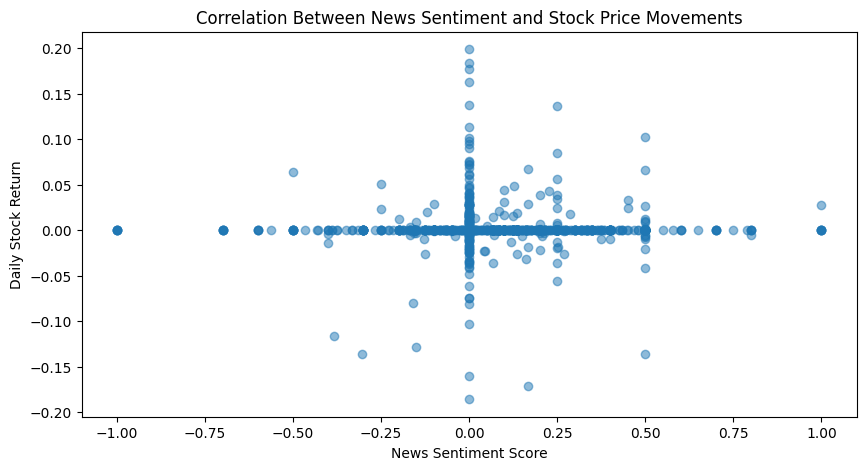

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(valid_data['sentiment'], valid_data['daily_return'], alpha=0.5)
plt.xlabel('News Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.title('Correlation Between News Sentiment and Stock Price Movements')
plt.show()

## 12. Correlation Heatmap
Selects relevant numeric columns, computes the correlation matrix, and visualizes it as a heatmap to show the strength and direction of relationships between variables.

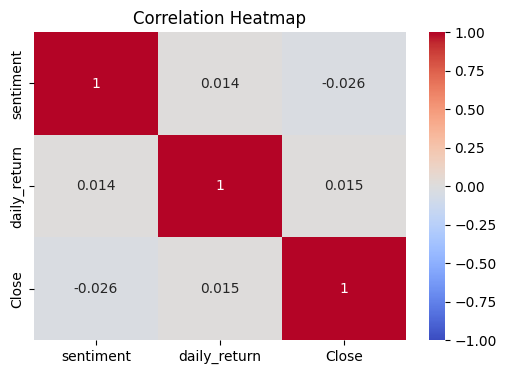

In [25]:
# Select relevant numeric columns for correlation
corr_data = valid_data[['sentiment', 'daily_return', 'Close']]

# Compute correlation matrix
corr_matrix = corr_data.corr(method='pearson')  # You can use 'spearman' or 'kendall' as well

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()